# Edited by Ashen; 微信公众号:爱研思谈; Github:AshenOneme

### 网架结构案例(在OpenSeespy内进行坐标转换)

In [67]:
import openseespy.opensees as ops
import opsvis as opsv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator,FormatStrFormatter
from pylab import *
import os

In [68]:
Nodes=np.loadtxt('Node.txt',skiprows=1,delimiter=',')
Elements=np.loadtxt('element.txt',skiprows=1,delimiter=',')

In [69]:
ops.wipe()
ops.model('basic', '-ndm', 3, '-ndf', 6)
IDSteel = 1
Fy_Steel = 400
E0_Steel = 206000
bs_Steel = 0.005
R0 = 12.5
cR1 = 0.925
cR2 = 0.15
ops.uniaxialMaterial('Steel02', IDSteel, Fy_Steel, E0_Steel, bs_Steel,R0,cR1,cR2)

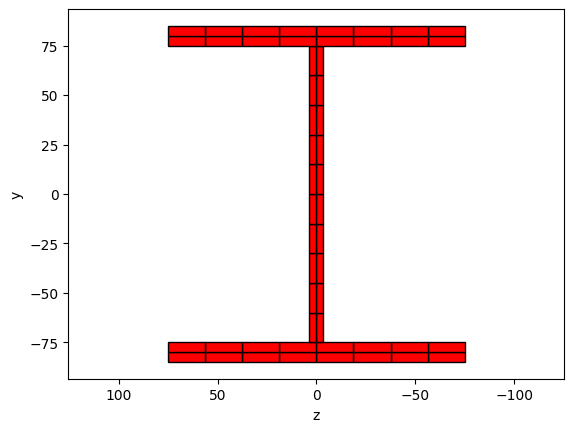

In [70]:
HI=150
WI=150
cx=10
cy=7

A=[-HI/2-cx,-WI/2]
B=[-HI/2,WI/2]
C=[-HI/2,-cy/2]
D=[HI/2,cy/2]
E=[HI/2,-WI/2]
F=[HI/2+cx,WI/2]

I_section=1
ops.section('Fiber', I_section, '-GJ', 1.0e6)
ops.patch('rect', IDSteel, 1, 4, A[0], A[1], B[0], B[1])
ops.patch('rect', IDSteel, 4, 1, C[0], C[1], D[0], D[1])
ops.patch('rect', IDSteel, 1, 4, E[0], E[1], F[0], F[1])

fib_sec_1 = [['section', 'Fiber', 1, '-GJ', 1.0e6],
             ['patch', 'rect', IDSteel, 2, 8, A[0], A[1], B[0], B[1]],
             ['patch', 'rect', IDSteel, 10, 2, C[0], C[1], D[0], D[1]],
             ['patch', 'rect', IDSteel, 2, 8, E[0], E[1], F[0], F[1]],
             ]

matcolor = ['r']
opsv.plot_fiber_section(fib_sec_1, matcolor=matcolor)
plt.axis('equal')
plt.show()

C:\Users\Ashen\AppData\Local\Temp\ipykernel_55884\2052915022.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  section_orientation=[-element_orientation[1]/element_orientation[0],1,0]
C:\Users\Ashen\AppData\Local\Temp\ipykernel_55884\2052915022.py:20: RuntimeWarning: invalid value encountered in double_scalars
  X=section_orientation[0]/L2
C:\Users\Ashen\AppData\Local\Temp\ipykernel_55884\2052915022.py:33: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


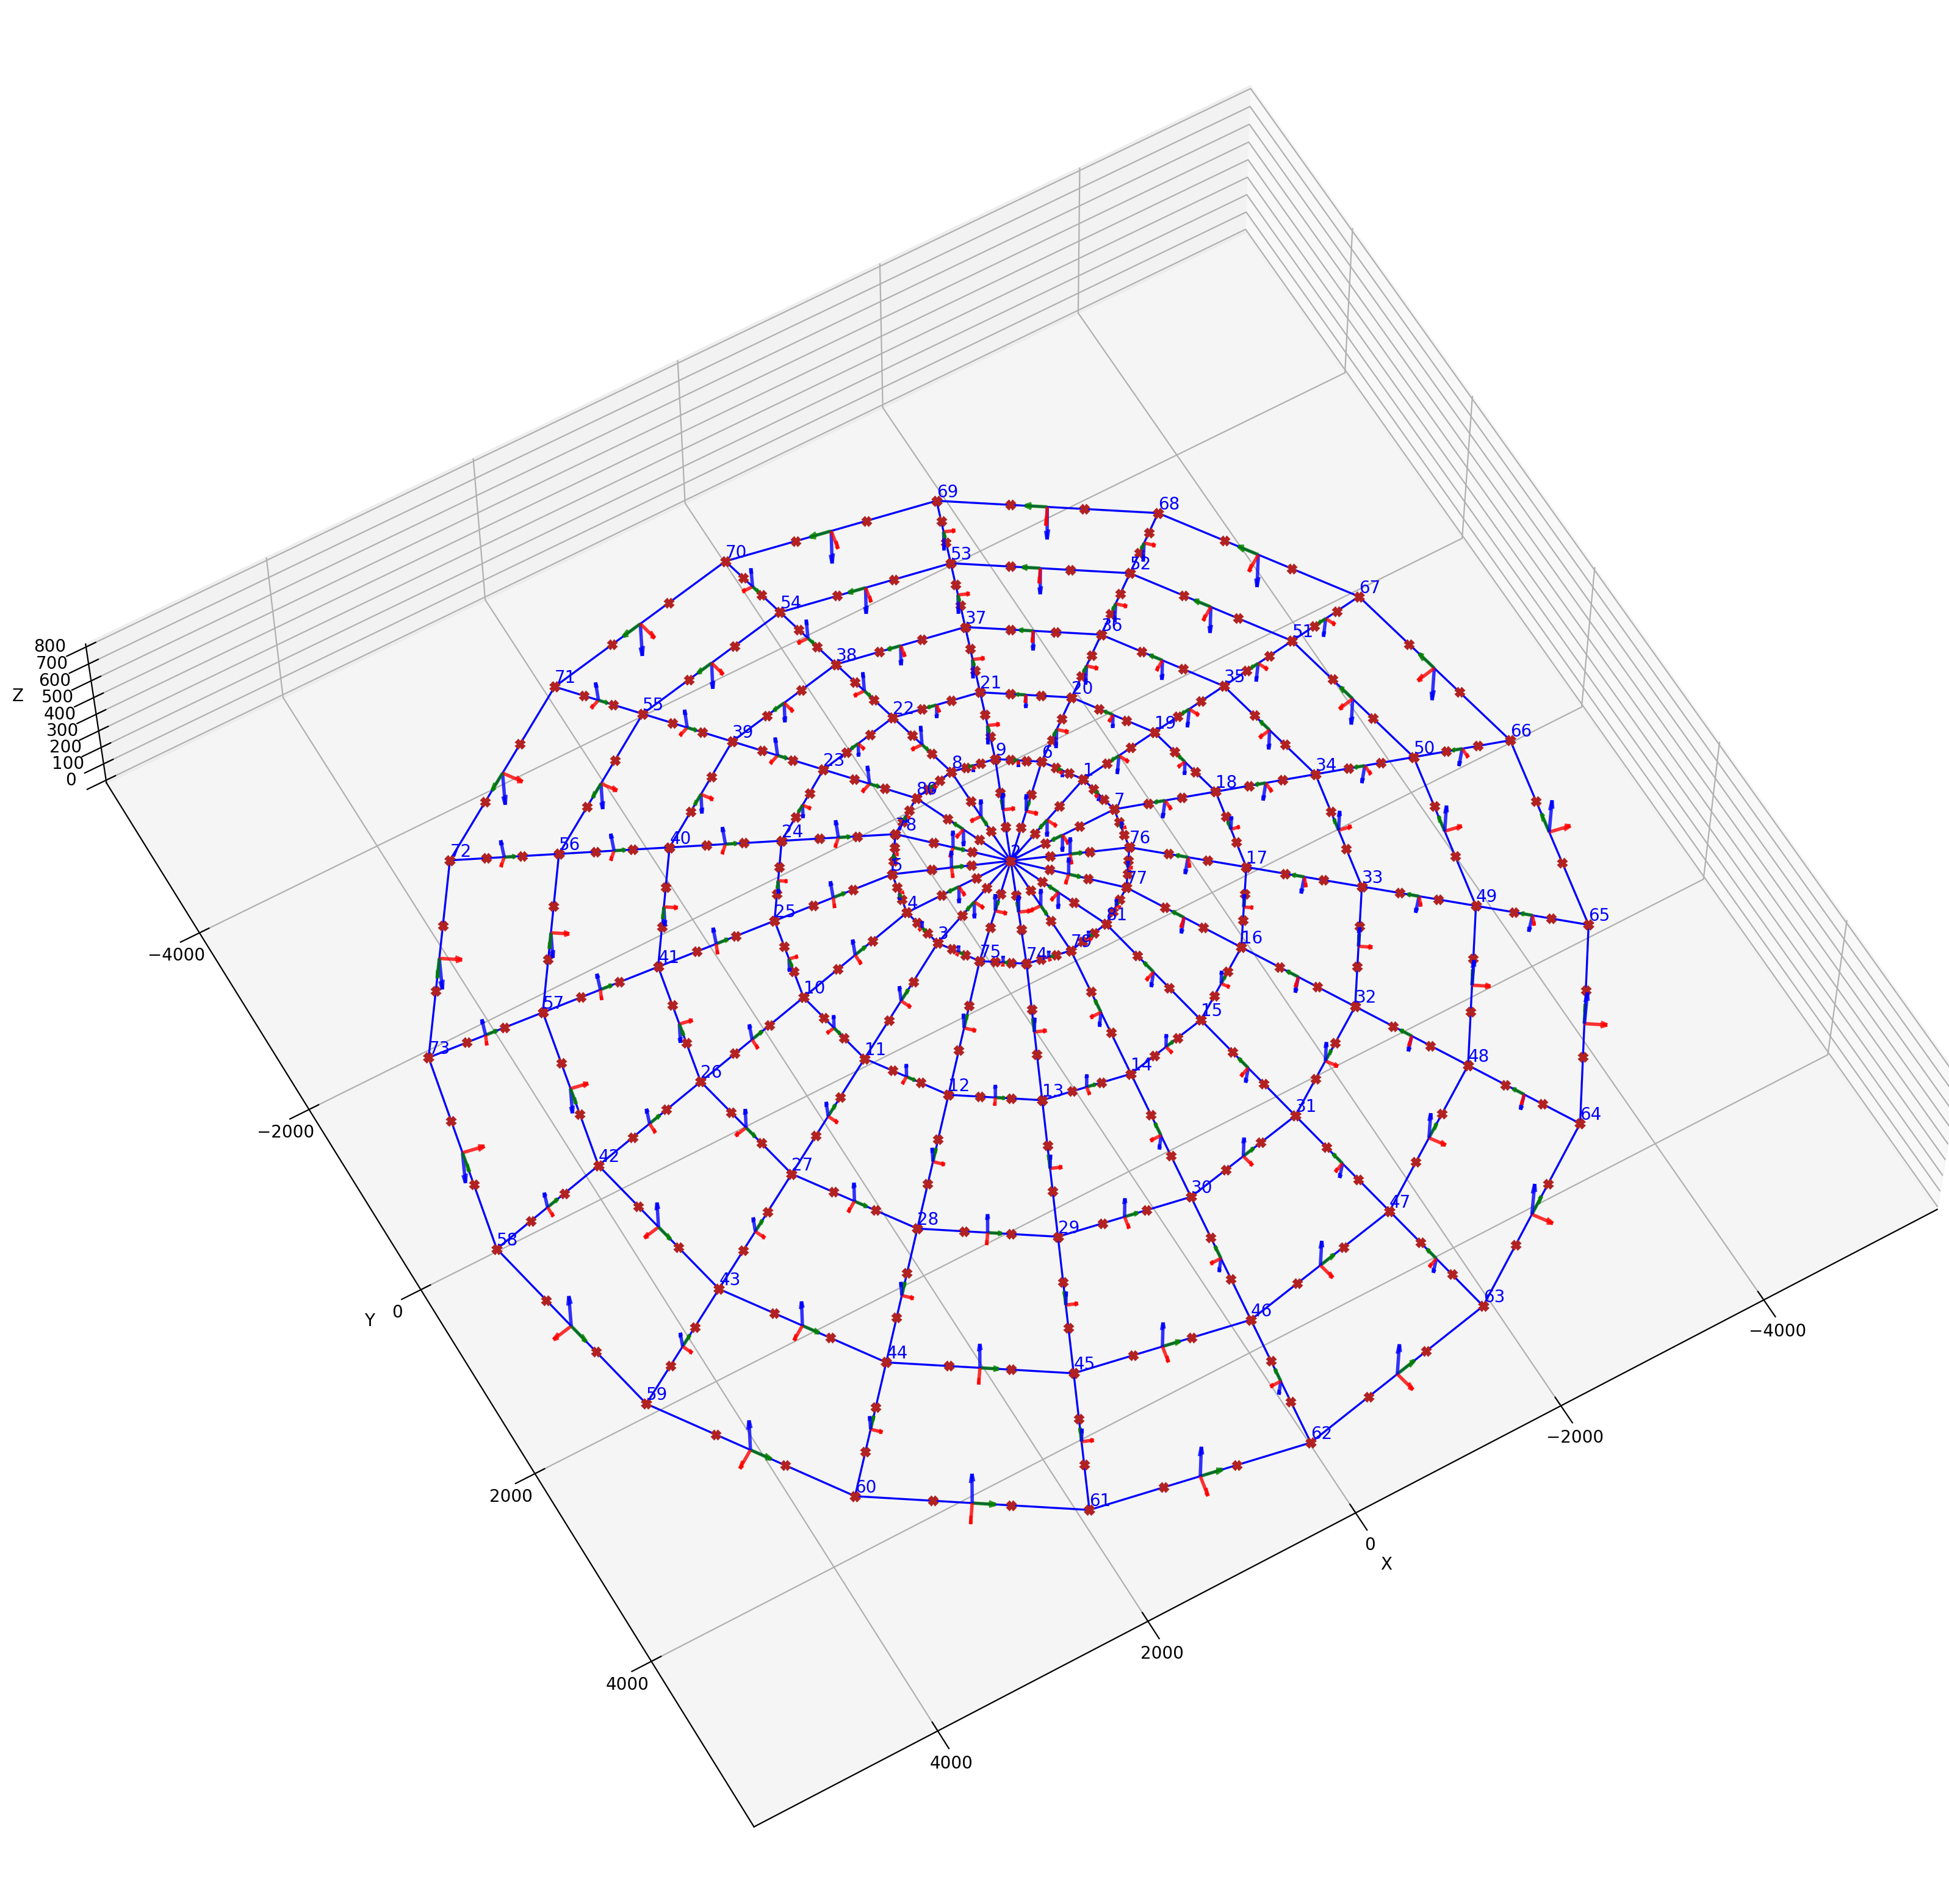

C:\Users\Ashen\AppData\Local\Temp\ipykernel_55884\2052915022.py:41: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


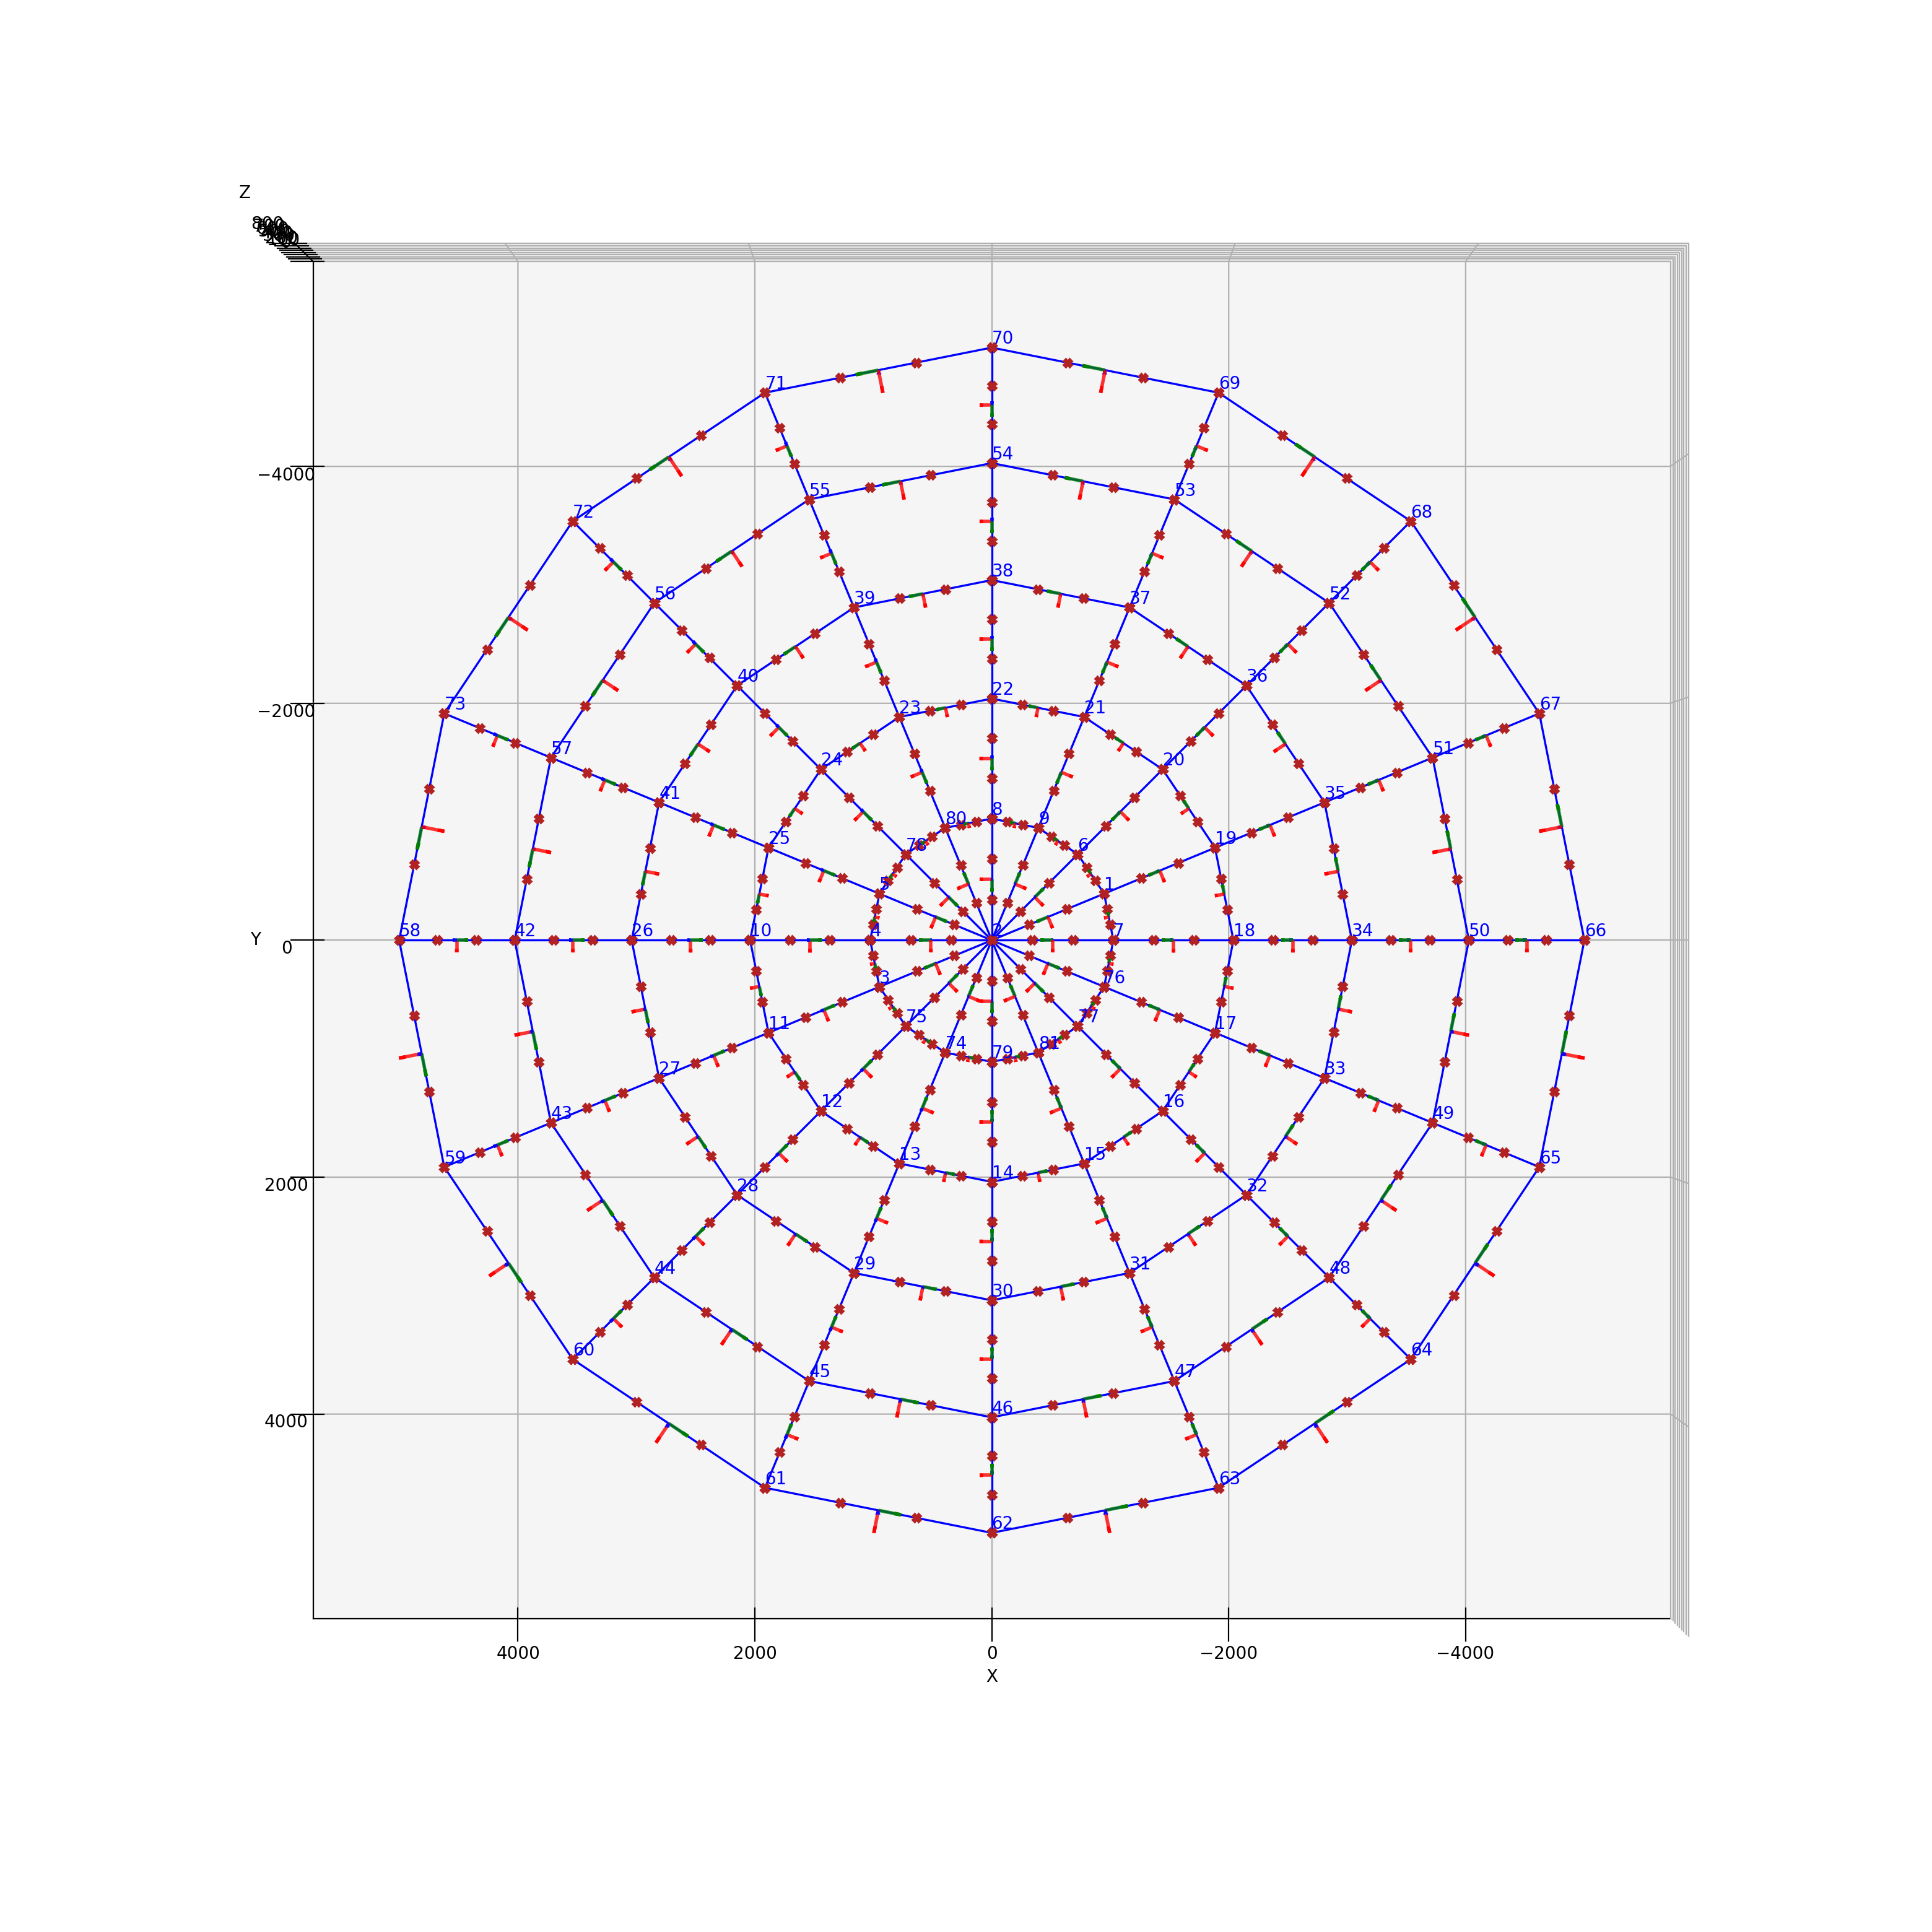

C:\Users\Ashen\AppData\Local\Temp\ipykernel_55884\2052915022.py:48: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


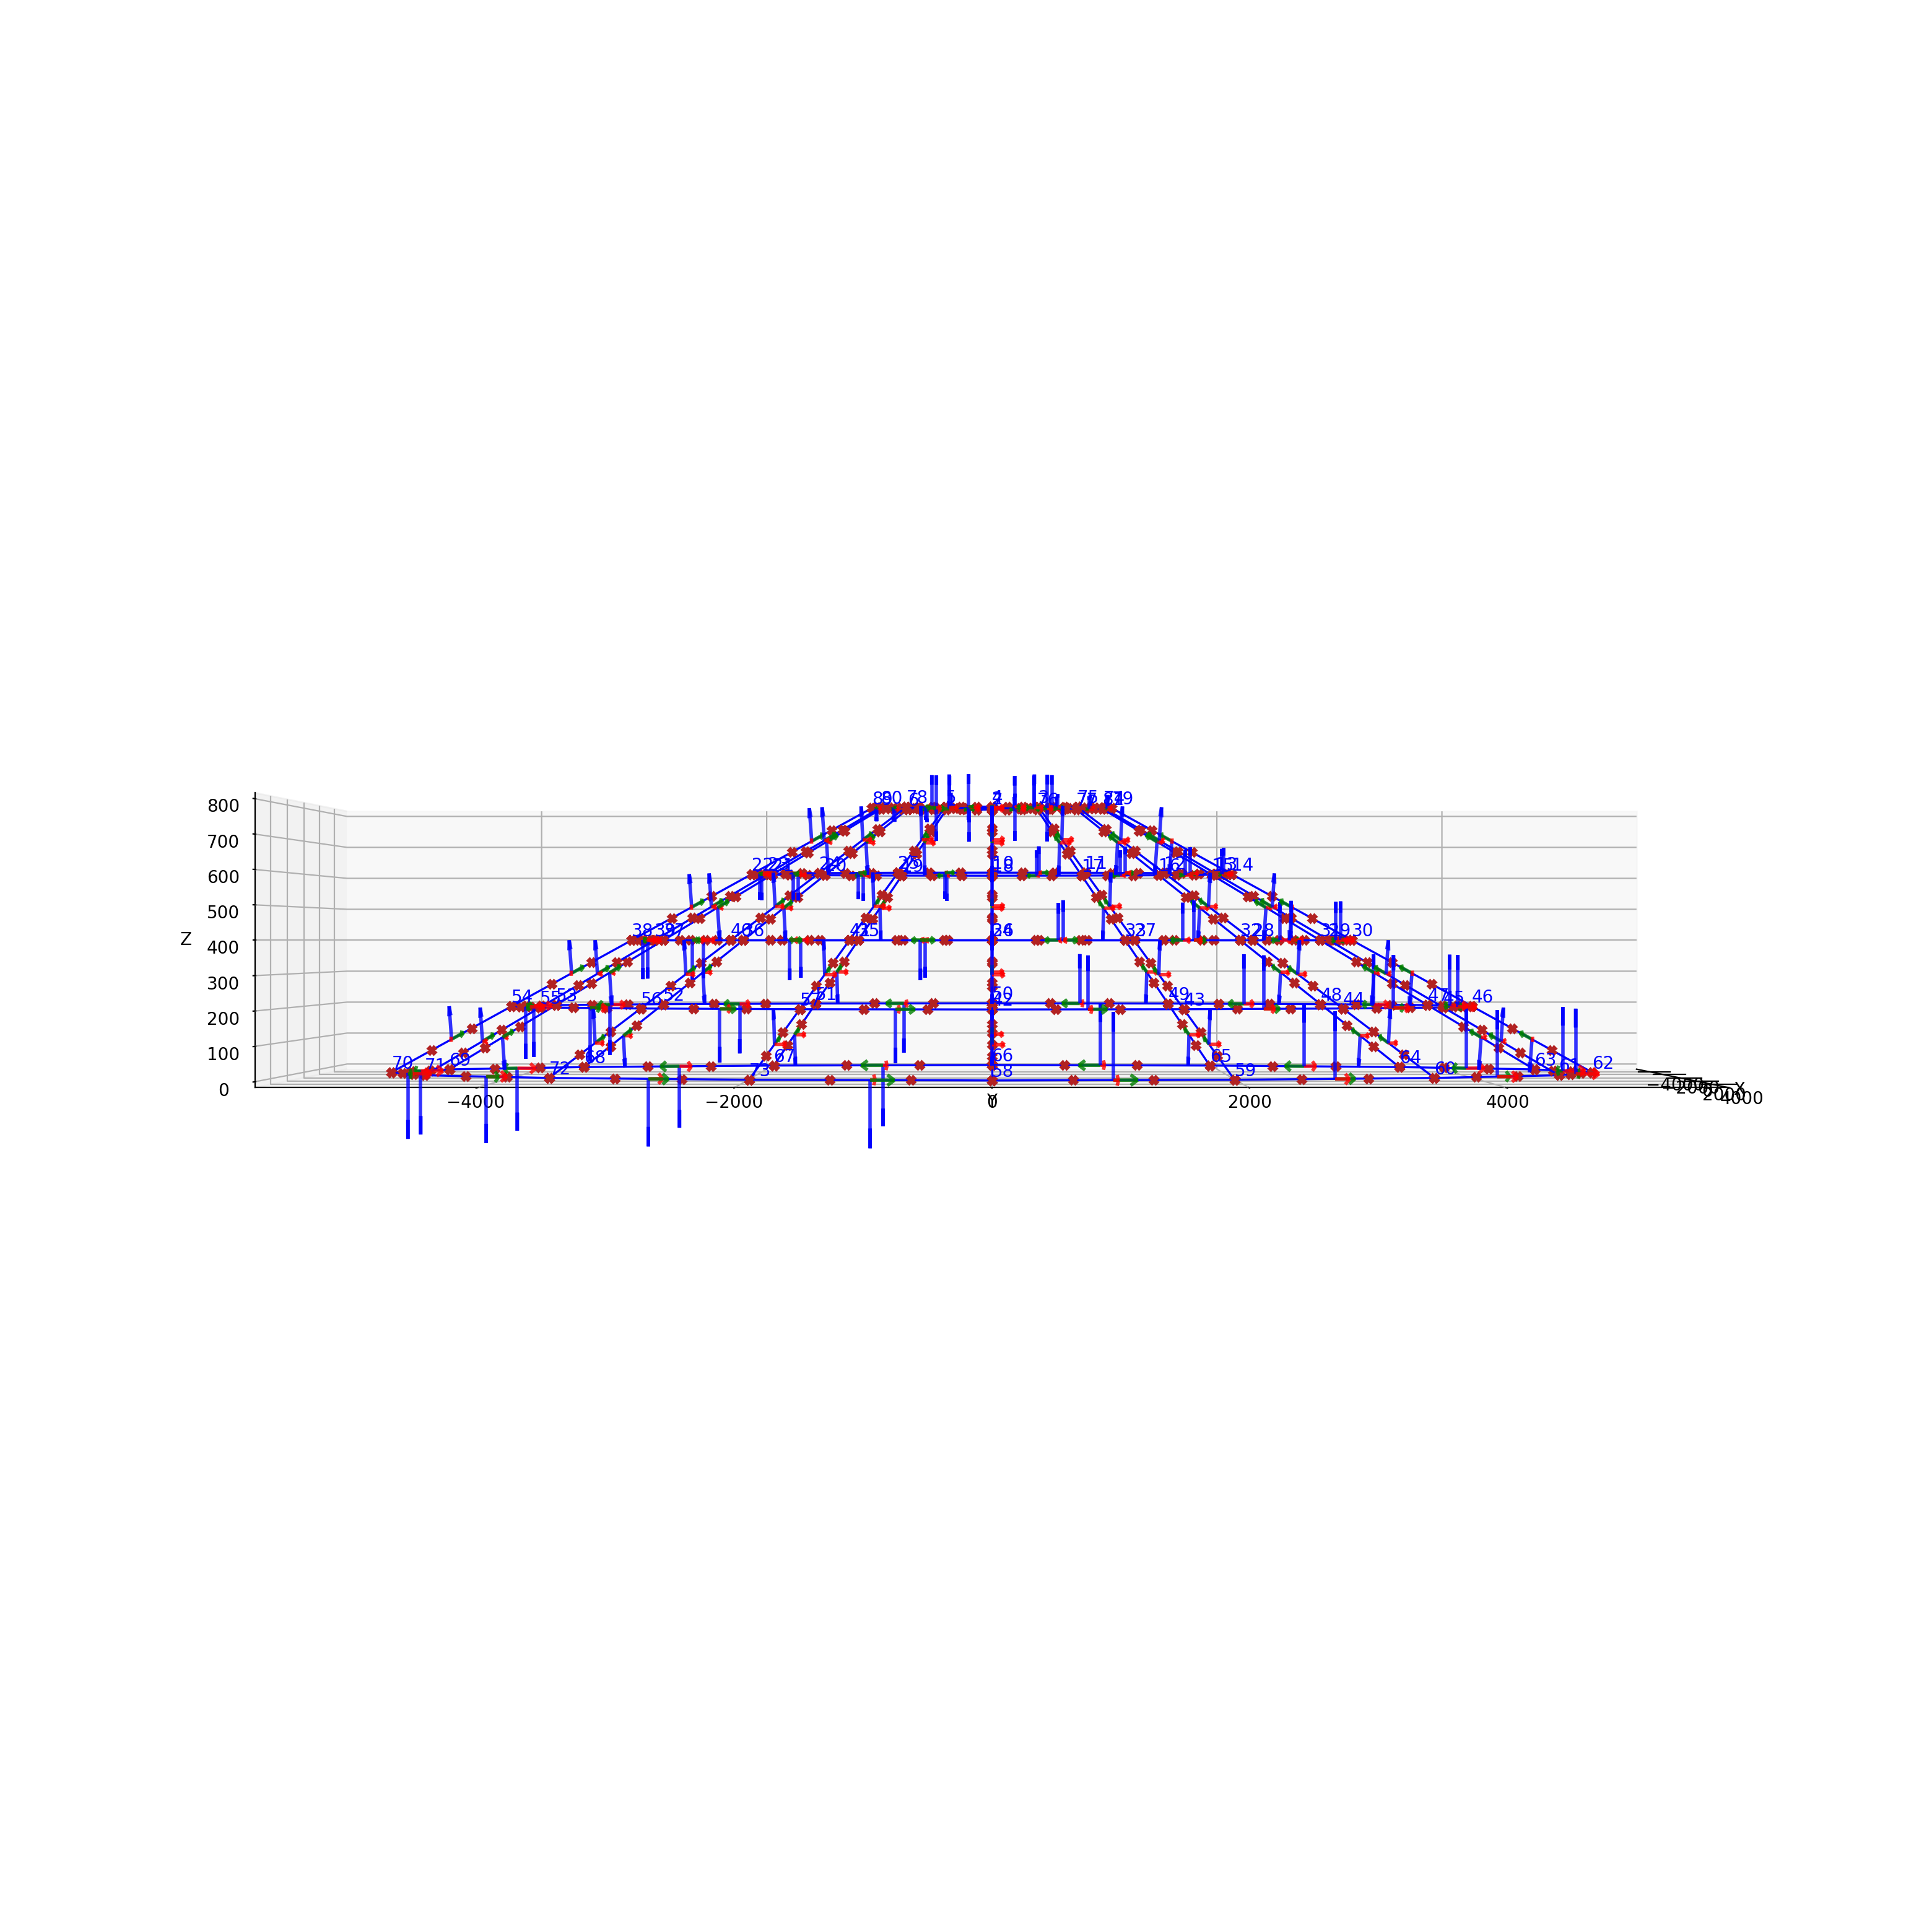

In [71]:
# %matplotlib widget
coordTransf = "PDelta"  # Linear, PDelta, Corotational

for node in Nodes:
    NodeTag=int(node[0])
    NodeTagX=node[1]
    NodeTagY=node[2]
    NodeTagZ=node[3]
    ops.node(NodeTag,NodeTagX,NodeTagY,NodeTagZ)
for element in Elements:
    ElementTag=int(element[0])
    ElementStart=int(element[1])
    ElementEnd=int(element[2])
    element_orientation=Nodes[ElementStart-1,1:4]-Nodes[ElementEnd-1,1:4]
    section_orientation=[-element_orientation[1]/element_orientation[0],1,0]
    L2=np.sqrt(section_orientation[0]**2+section_orientation[1]**2+section_orientation[2]**2)
    IDTransf=ElementTag
    IDIntegration=ElementTag
    
    X=section_orientation[0]/L2
    Y=section_orientation[1]/L2
    Z=section_orientation[2]/L2
    Transf=np.array([X,Y,Z])
    Transf[np.isnan(Transf)] = 1

    ops.geomTransf(coordTransf,IDTransf,Transf[0],Transf[1],Transf[2])

    ops.beamIntegration('Trapezoidal', IDIntegration, I_section,4)

    ops.element('dispBeamColumn',ElementTag,ElementStart,ElementEnd,IDTransf,IDIntegration)
    
fig=plt.figure(figsize=(20,20),dpi=200)
ax=fig.gca(projection='3d')
opsv.plot_model(ax=ax,node_labels=1,element_labels=0)
ax.view_init(90, 90, 'z')
ax.view_init(60, 60, 'z')
plt.gca().set_box_aspect((5., 5., 1.))
plt.show()

fig=plt.figure(figsize=(20,20),dpi=200)
ax=fig.gca(projection='3d')
opsv.plot_model(ax=ax,node_labels=1,element_labels=0)
ax.view_init(90, 90, 'z')
plt.gca().set_box_aspect((5., 5., 1.))
plt.show()

fig=plt.figure(figsize=(20,20),dpi=200)
ax=fig.gca(projection='3d')
opsv.plot_model(ax=ax,node_labels=1,element_labels=0)
ax.view_init(0, 0, 'z')
plt.gca().set_box_aspect((5., 5., 1.))
plt.show()

In [72]:
for i in range(58,74):
    ops.fix(i,1,1,1,0,0,0)

In [73]:
#记录所有节点信息
from Picture import record_nodes
record_nodes()

In [74]:
ops.recorder('Node', '-file', "Disp.txt","-time",'-node', 2,'-dof',3, 'disp')
ops.recorder('Node', '-file', "Reaction.txt","-time",'-nodeRange',58,73,'-dof',3, 'reaction')

ops.timeSeries('Linear', 11)
ops.pattern('Plain', 100,11)
for i in range(1,10):
    ops.load(i,0,0,-1,0,0,0)
for i in range(74,82):
    ops.load(i,0,0,-1,0,0,0)
ops.constraints("Penalty",1e15,1e15)
ops.numberer("RCM")
ops.system("BandGeneral")
ops.test('NormDispIncr', 1e-5, 2000)
ops.algorithm("KrylovNewton")
for i in range(1,10):
    ops.integrator("DisplacementControl",i,3,-1)
    ops.analysis("Static")
    ops.analyze(1000)
for i in range(74,82):
    ops.integrator("DisplacementControl",i,3,-1)
    ops.analysis("Static")
    ops.analyze(1000)


after: 2000 iterations  current Norm: 119844 (max: 1e-05, Norm deltaR: 5.45397e+11)
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
StaticAnalysis::analyze() - the Algorithm failed at step: 585 with domain at load factor -6.64015e+07
OpenSees > analyze failed, returned: -3 error flag
after: 2000 iterations  current Norm: 18192.8 (max: 1e-05, Norm deltaR: 1.07034e+10)
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
StaticAnalysis::analyze() - the Algorithm failed at step: 0 with domain at load factor -1.52648e+07
OpenSees > analyze failed, returned: -3 error flag
after: 2000 iterations  current Norm: 39840.9 (max: 1e-05, Norm deltaR: 5.22873e+09)
AcceleratedNewton::solveCurrentStep() -The ConvergenceTest object failed in test()
StaticAnalysis::analyze() - the Algorithm failed at step: 3 with domain at load factor 4.94063e+06
OpenSees > analyze failed, returned: -3 error flag
after: 2000 iterations  current Norm: 5577.

In [75]:
#绘制动画
from Picture import draw
draw(580,20,1,0.1,10000,0,0)
ops.wipe()


=       The paint module module is being loaded......            =
=       Start time             		 2023-02-13 10:16:11         =
=       This is dedicated to my research group                   =
=       Adapted from Ashen       mailbox:2307603152@qq.com       =
██████████████████████████████████████████████████ 100.0%|100% 	已用时间: 12.36S

<Figure size 1000x1000 with 0 Axes>

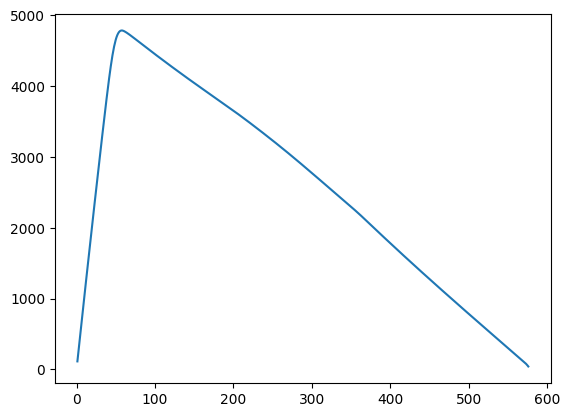

In [77]:
disp=np.loadtxt('Disp.txt',usecols=1)
reaction=np.loadtxt('Reaction.txt')
reactionsum=np.sum(reaction[:,1:],axis=1)/1000
plt.plot(-disp,reactionsum)
plt.show()